In [1]:
import pandas as pd
import pickle 
from datetime import datetime
from datetime import timedelta

In [9]:
df = pd.read_pickle('scraped.pickle').reset_index().drop(columns=['index'])

In [10]:
# clean up the airline columns
def clean_airlines(a):
    a=a.replace('"','')
    return a
df['airline']=df['airline'].apply(clean_airlines)


In [11]:
#clean up distance variable
import re
def get_mile (m):
    d = re.findall('([^ \r\n]+) mi?([\r\n]| |$)', m, re.IGNORECASE)
    for result in d:
        return int(result[0].replace(",", ""))
df['distance']=df['distance'].apply(get_mile)

In [12]:
#clean up all the datetime variables
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].dt.strftime('%Y-%m-%d')

In [13]:
def clean(x):
    try:
        x=x.replace(' PDT','').strip()
    #x=x.replace(' MDT','').strip()
    #x=x.replace(' AKDT','').strip()
    #x=x.replace(' AKDT\n (+1)','').strip()
    #x=x.replace('\n (+1)','').strip()
    except:
        pass
    return str(x)

In [14]:
df.loc[df['scheduled_departure']=='--','scheduled_departure']=None
df.loc[df['actual_departure']=='--','actual_departure']=None
df.loc[df['scheduled_takeoff']=='--','scheduled_takeoff']=None
df.loc[df['actual_takeoff']=='--','actual_takeoff']=None

In [15]:
df['scheduled_departure'] = df['date']+df['scheduled_departure'].apply(clean)
df['actual_departure'] = df['date']+df['actual_departure'].apply(clean)
df['scheduled_takeoff'] = df['date']+df['scheduled_takeoff'].apply(clean)
df['actual_takeoff'] = df['date']+df['actual_takeoff'].apply(clean)

In [16]:
def clean2(x):
    if len(x)==15:
        return pd.to_datetime(x,format="%Y-%m-%d%H:%M")
    if len(x)==17:
        return pd.to_datetime(x,format="%Y-%m-%d%I:%M%p")

In [17]:
df['scheduled_departure']=df['scheduled_departure'].apply(clean2)
df['actual_departure'] = df['actual_departure'].apply(clean2)
df['scheduled_takeoff'] = df['scheduled_takeoff'].apply(clean2)
df['actual_takeoff'] = df['actual_takeoff'].apply(clean2)

In [18]:
# create weekday
df['day_of_week'] =pd.to_datetime(df['date']).dt.weekday_name

In [19]:
#calculate delay 
df['departure_delay']=df['actual_departure']-df['scheduled_departure']
df['departure_delay_min']=df['departure_delay'].dt.total_seconds()

In [20]:
df['takeoff_delay']=df['actual_takeoff']-df['scheduled_takeoff']
df['takeoff_delay_min']=df['takeoff_delay'].dt.total_seconds()

In [21]:
def change_to_min(x):
    try:
        x=int(x/60)
    except:
        pass
    return x

In [22]:
df['departure_delay_min']=df['departure_delay_min'].apply(change_to_min)

In [23]:
df['takeoff_delay_min']=df['takeoff_delay_min'].apply(change_to_min)

In [24]:
df=df.drop(columns='gate')

In [25]:
df['s_depart_hr']=df['scheduled_departure'].dt.hour

In [26]:
df_p = pd.read_pickle('scraped1.pickle')#.reset_index().drop(columns=['index'])

df_p=df_p.drop(columns=['precipitation', 'snowfall','avgwind', 'fog'])
df_p.columns

Index(['date', 'airline', 'aircraft', 'flightid', 'destination', 'distance',
       'scheduled_departure', 'actual_departure', 'scheduled_takeoff',
       'actual_takeoff', 'delay', 'day_of_week', 'departure_delay',
       's_depart_hr', 'departure_delay_min', 'takeoff_delay',
       'takeoff_delay_min'],
      dtype='object')

In [27]:
import re
def modify(a):
    a=re.sub("^K|^P",'',a)
    return a

In [28]:
df_p['destination']=df_p['destination'].apply(modify)
df_p

,date,airline,aircraft,flightid,destination,distance,scheduled_departure,actual_departure,scheduled_takeoff,actual_takeoff,delay,day_of_week,departure_delay,s_depart_hr,departure_delay_min,takeoff_delay,takeoff_delay_min
0,2018-07-13,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1044,2018-07-13 20:34:00,2018-07-13 20:59:00,2018-07-13 20:34:00,2018-07-13 23:13:00,on time,Friday,00:25:00,20.0,25.0,02:39:00,159.0
1,2018-07-12,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1084,2018-07-12 20:34:00,2018-07-12 20:43:00,2018-07-12 20:34:00,2018-07-12 23:18:00,on time,Thursday,00:09:00,20.0,9.0,02:44:00,164.0
2,2018-07-11,ABX,Boeing 767-300 (twin-jet),GB1817,LAX,1041,2018-07-11 20:34:00,2018-07-11 21:23:00,2018-07-11 20:34:00,2018-07-11 23:30:00,49 minutes late,Wednesday,00:49:00,20.0,49.0,02:56:00,176.0
3,2018-07-10,ABX,Boeing 767-200 (twin-jet),GB1817,SEA,628,2018-07-10 20:34:00,2018-07-10 21:10:00,2018-07-10 20:34:00,2018-07-10 22:37:00,36 minutes late,Tuesday,00:36:00,20.0,36.0,02:03:00,123.0
4,2018-07-10,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,628,2018-07-10 20:34:00,2018-07-10 21:10:00,2018-07-10 20:34:00,2018-07-10 22:37:00,36 minutes late,Tuesday,00:36:00,20.0,36.0,02:03:00,123.0
5,2018-07-09,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1045,2018-07-09 20:34:00,2018-07-09 20:49:00,2018-07-09 20:34:00,2018-07-09 23:04:00,on time,Monday,00:15:00,20.0,15.0,02:30:00,150.0
6,2018-07-06,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1063,2018-07-06 20:34:00,2018-07-06 20:43:00,2018-07-06 20:34:00,2018-07-06 23:02:00,on time,Friday,00:09:00,20.0,9.0,02:28:00,148.0
7,2018-07-05,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1016,2018-07-05 20:34:00,2018-07-05 20:41:00,2018-07-05 20:34:00,2018-07-05 23:06:00,on time,Thursday,00:07:00,20.0,7.0,02:32:00,152.0
8,2018-07-03,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1045,2018-07-03 20:34:00,2018-07-03 21:03:00,2018-07-03 20:34:00,2018-07-03 23:14:00,on time,Tuesday,00:29:00,20.0,29.0,02:40:00,160.0
9,2018-07-02,ABX,Boeing 767-200 (twin-jet),GB1817,LAX,1068,2018-07-02 20:34:00,2018-07-02 20:51:00,2018-07-02 20:34:00,2018-07-02 22:59:00,on time,Monday,00:17:00,20.0,17.0,02:25:00,145.0


In [29]:
df=df[['date', 'airline', 'aircraft', 'flightid', 'destination', 'distance',
       'scheduled_departure', 'actual_departure', 'scheduled_takeoff',
       'actual_takeoff', 'delay', 'day_of_week', 'departure_delay',
       's_depart_hr', 'departure_delay_min','takeoff_delay','takeoff_delay_min']]

In [30]:
df_t=pd.concat([df,df_p],ignore_index=True)

In [31]:
df_t=df_t.drop_duplicates()

In [32]:
df_t.shape

(7628, 17)

In [34]:
import csv
weather= pd.read_csv('1401243.csv',index_col=0)

In [35]:
weather_sub=weather[['DATE','PRCP','SNOW','AWND','WT01']].reset_index()

In [36]:
df_w=df_t.merge(weather_sub, left_on='date', right_on='DATE', how='left')

In [37]:
df_w=df_w.drop(columns=['DATE','STATION'])

In [38]:
df_w['PRCP']=df_w['PRCP'].fillna(0)
df_w['SNOW']=df_w['SNOW'].fillna(0)
df_w['WT01']=df_w['WT01'].fillna(0)

In [39]:
df_w['month']=df_w['scheduled_departure'].dt.strftime('%m')
df_w['day']=df_w['scheduled_departure'].dt.strftime('%d')

In [40]:
df_w['monthday']=df_w['month']+df_w['day']

In [41]:
df_w['distance']=pd.to_numeric(df_w['distance'],errors='coerce')

In [42]:
df_w['aircraft'].value_counts()

Boeing 737-700 (twin-jet)                   2649
Airbus A320 (twin-jet)                      1602
Boeing 737-900 (twin-jet)                    705
Boeing 737-800 (twin-jet)                    701
Embraer 175 (twin-jet)                       622
Airbus A321 (twin-jet)                       396
Airbus A319 (twin-jet)                       256
de Havilland Dash 8-400 (twin-turboprop)     253
Boeing 767-200 (twin-jet)                    148
Embraer ERJ 175 (twin-jet)                   136
Boeing 717-200 (twin-jet)                     68
Boeing 747-400 (quad-jet)                     22
Boeing 777-200LR/F (twin-jet)                 18
Airbus A300F4-600 (twin-jet)                  16
McDonnell Douglas MD-11 (tri-jet)              9
Boeing 757-200 (twin-jet)                      7
Embraer 170/175 (twin-jet)                     5
Canadair Regional Jet CRJ-700 (twin-jet)       5
Boeing 767-300 (twin-jet)                      4
Canadair Regional Jet CRJ-200 (twin-jet)       2
Boeing 757-300 (twin

In [43]:
df_w['capacity']=0
df_w.loc[(df_w['aircraft']=='Boeing 737-700 (twin-jet)'),'capacity']=149
df_w.loc[(df_w['aircraft']=='Boeing 737-900 (twin-jet)'),'capacity']=220
df_w.loc[(df_w['aircraft']=='Boeing 737-800 (twin-jet)'),'capacity']=162
df_w.loc[(df_w['aircraft']=='Boeing 767-200 (twin-jet)'),'capacity']=181
df_w.loc[(df_w['aircraft']=='Boeing 747-400 (quad-jet)'),'capacity']=416
df_w.loc[(df_w['aircraft']=='Boeing 767-300 (twin-jet)'),'capacity']=218
df_w.loc[(df_w['aircraft']=='Boeing 777-200LR/F (twin-jet)'),'capacity']=301
df_w.loc[(df_w['aircraft']=='Airbus A320 (twin-jet)'),'capacity']=150
df_w.loc[(df_w['aircraft']=='Airbus A321 (twin-jet)'),'capacity']=230
df_w.loc[(df_w['aircraft']=='Airbus A319 (twin-jet)'),'capacity']=160
df_w.loc[(df_w['aircraft']=='Embraer 175 (twin-jet)'),'capacity']=78
df_w.loc[(df_w['aircraft']=='Embraer ERJ 175 (twin-jet)'),'capacity']=88
df_w.loc[(df_w['aircraft']=='Boeing 717-200 (twin-jet)'),'capacity']=106
df_w.loc[(df_w['aircraft']=='Boeing 757-200 (twin-jet)'),'capacity']=200
df_w.loc[(df_w['aircraft']=='Boeing 737-500 (twin-jet)'),'capacity']=145
df_w.loc[(df_w['aircraft']=='Boeing 757-300 (twin-jet)'),'capacity']=295
df_w.loc[(df_w['aircraft']=='de Havilland Dash 8-400 (twin-turboprop)'),'capacity']=78
df_w.loc[(df_w['aircraft']=='Airbus A300F4-600 (twin-jet)'),'capacity']=266
df_w.loc[(df_w['aircraft']=='McDonnell Douglas MD-11 (tri-jet)'),'capacity']=298
df_w.loc[(df_w['aircraft']=='Canadair Regional Jet CRJ-700 (twin-jet'),'capacity']=78

In [44]:
df_w['weekend']=0
df_w.loc[(df_w['scheduled_departure'].dt.weekday>4),'weekend']=1

In [45]:
df_w['dep_hour']=pd.to_numeric(df_w['s_depart_hr'],errors='coerce')

In [46]:
df_w['timeperiod']='6-12'
df_w.loc[((df_w['dep_hour']>12) & (df_w['dep_hour']<=18) ),'timeperiod']='12-18'
df_w.loc[((df_w['dep_hour']>18) & (df_w['dep_hour']<=24) ),'timeperiod']='18-24'
df_w.loc[((df_w['dep_hour']>0) & (df_w['dep_hour']<=6) ),'timeperiod']='0-6'

In [47]:
#holiday
df_w['holiday']=0
df_w.loc[(df_w['date']=='2018-05-28')|(df_w['date']=='2018-05-13')|(df_w['date']=='2018-05-17')|(df_w['date']=='2018-07-04'),'holiday']=1

In [48]:
df_w=df_w.dropna(subset=['departure_delay_min','takeoff_delay_min'])

In [49]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 0 to 7627
Data columns (total 29 columns):
date                   7558 non-null object
airline                7558 non-null object
aircraft               7558 non-null object
flightid               7558 non-null object
destination            7558 non-null object
distance               7437 non-null float64
scheduled_departure    7558 non-null datetime64[ns]
actual_departure       7558 non-null datetime64[ns]
scheduled_takeoff      7558 non-null datetime64[ns]
actual_takeoff         7558 non-null datetime64[ns]
delay                  7558 non-null object
day_of_week            7558 non-null object
departure_delay        7558 non-null timedelta64[ns]
s_depart_hr            7558 non-null float64
departure_delay_min    7558 non-null float64
takeoff_delay          7558 non-null timedelta64[ns]
takeoff_delay_min      7558 non-null float64
PRCP                   7558 non-null float64
SNOW                   7558 non-null float64
A

In [50]:
df_w.to_pickle('with takeoff delay.pickle')

In [51]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
from scipy.stats import norm


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
df_w['takeoff_delay_min'].describe()

count    7558.000000
mean       11.732204
std       148.578118
min     -1439.000000
25%        11.000000
50%        18.000000
75%        28.000000
max       400.000000
Name: takeoff_delay_min, dtype: float64

In [53]:
# 
df_w.loc[(df_w['departure_delay_min']>120)|(df_w['departure_delay_min']<-120),'departure_delay_min']=None
df_w.loc[(df_w['takeoff_delay_min']>120)|(df_w['takeoff_delay_min']<-120),'takeoff_delay_min']=None

In [54]:
df_w=df_w.dropna(subset=['departure_delay_min','takeoff_delay_min'])

In [56]:
df_w['AWND']=df_w['AWND'].fillna(7.38)

In [58]:
destination_list=['LAX','SFO','ANC','DEN','LAS','PHX','ORD','PDX','DFW','SJC']

In [59]:
df_w=df_w[df_w['destination'].isin(destination_list)]

In [60]:
df_distance=df_w.groupby(by='destination').mean().reset_index().iloc[:,[0,1]]
df_distance

,destination,distance
0,ANC,1498.593254
1,DEN,1080.923077
2,DFW,1727.912801
3,LAS,955.967585
4,LAX,1026.143934
5,ORD,1804.237569
6,PDX,162.726829
7,PHX,1175.216981
8,SFO,769.402235
9,SJC,784.595556


In [61]:
for i in destination_list:
    df_w.loc[df_w['destination']==i,'distance']=df_w.loc[df_w['destination']==i,'distance'].fillna(df_distance.loc[df_distance['destination']==i,'distance'].tolist()[0])

In [62]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7014 entries, 0 to 7598
Data columns (total 29 columns):
date                   7014 non-null object
airline                7014 non-null object
aircraft               7014 non-null object
flightid               7014 non-null object
destination            7014 non-null object
distance               7014 non-null float64
scheduled_departure    7014 non-null datetime64[ns]
actual_departure       7014 non-null datetime64[ns]
scheduled_takeoff      7014 non-null datetime64[ns]
actual_takeoff         7014 non-null datetime64[ns]
delay                  7014 non-null object
day_of_week            7014 non-null object
departure_delay        7014 non-null timedelta64[ns]
s_depart_hr            7014 non-null float64
departure_delay_min    7014 non-null float64
takeoff_delay          7014 non-null timedelta64[ns]
takeoff_delay_min      7014 non-null float64
PRCP                   7014 non-null float64
SNOW                   7014 non-null float64
A

In [64]:
# merge historical delay data
avg_dep = pd.read_csv('dep_delays by month_day.csv')
avg_arr = pd.read_csv('arr_delays by month_day.csv')


In [65]:
# fill leading zeros to month aand day    
avg_dep['MONTH']=avg_dep['MONTH'].apply(lambda x: str(x).zfill(2))
avg_dep['DAY_OF_MONTH']=avg_dep['DAY_OF_MONTH'].apply(lambda x: str(x).zfill(2))

avg_arr['MONTH']=avg_arr['MONTH'].apply(lambda x: str(x).zfill(2))
avg_arr['DAY_OF_MONTH']=avg_arr['DAY_OF_MONTH'].apply(lambda x: str(x).zfill(2))

avg_dep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 5 columns):
MONTH           1220 non-null object
DAY_OF_MONTH    1220 non-null object
ORIGIN          1220 non-null object
DEST            1220 non-null object
DEP_DELAY       1220 non-null float64
dtypes: float64(1), object(4)
memory usage: 47.7+ KB


In [66]:
# merge with df_m
df_w=pickle.load(open( "with takeoff delay.pickle", "rb" )) 

df_w['day_merge']=df_w['month']+df_w['day']+df_w['destination']

avg_dep['day_merge']=avg_dep['MONTH']+avg_dep['DAY_OF_MONTH']+avg_dep['DEST']
avg_arr['day_merge']=avg_arr['MONTH']+avg_arr['DAY_OF_MONTH']+avg_arr['ORIGIN']




In [67]:
df_w = pd.merge(df_w, avg_dep,  how='left', 
          left_on=['day_merge'],right_on = ['day_merge'])



In [68]:
df_w = pd.merge(df_w, avg_arr,  how='left', 
          left_on=['day_merge'],right_on = ['day_merge'])



In [69]:
df_w=df_w.fillna(0)

In [70]:
df_w=df_w.sort_values(['date'],ascending=False)[8:]

In [71]:
#holiday=['2018-05-13','2018-05-28','2018-06-17','2018-07-14']
h1=pd.to_datetime('2018-05-13', format='%Y-%m-%d', errors='ignore')
h2=pd.to_datetime('2018-05-28', format='%Y-%m-%d', errors='ignore')
h3=pd.to_datetime('2018-06-17', format='%Y-%m-%d', errors='ignore')
h4=pd.to_datetime('2018-07-04', format='%Y-%m-%d', errors='ignore')

#from_holiday(d)

In [72]:
import datetime
def from_holiday(d):
    holiday=[h1,h2,h3,h4]
    days=[]
    for i in holiday:
        days.append(abs(d-i))
    numdays=datetime.timedelta.total_seconds(min(days))/60/60/24
    
    return numdays
        

In [73]:
df_w['days_from_holiday']=df_w['scheduled_takeoff'].apply(from_holiday)

In [75]:
df_w.loc[(df_w['takeoff_delay_min']>76)|(df_w['takeoff_delay_min']<-32),'takeoff_delay_min']=None
df_w.loc[(df_w['departure_delay_min']>55)|(df_w['departure_delay_min']<-47),'departure_delay_min']=None
df_w=df_w.dropna()

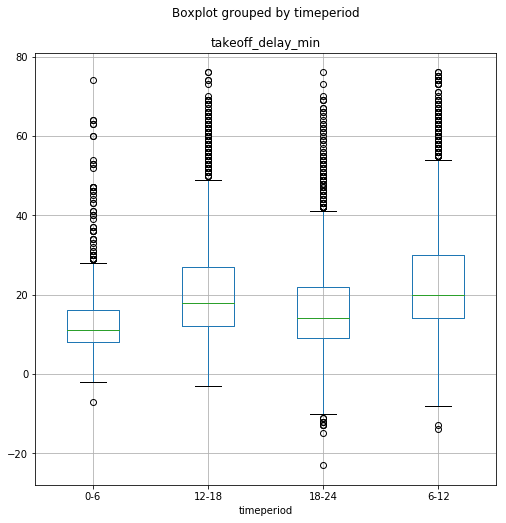

In [76]:
df_w.boxplot('takeoff_delay_min',by='timeperiod',figsize=(8,8));

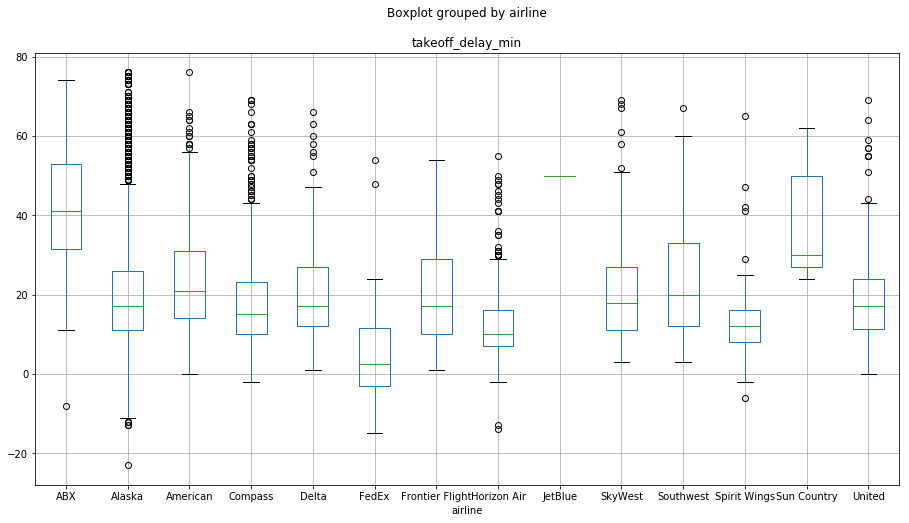

In [77]:
df_w.boxplot('takeoff_delay_min',by='airline',figsize=(15,8));

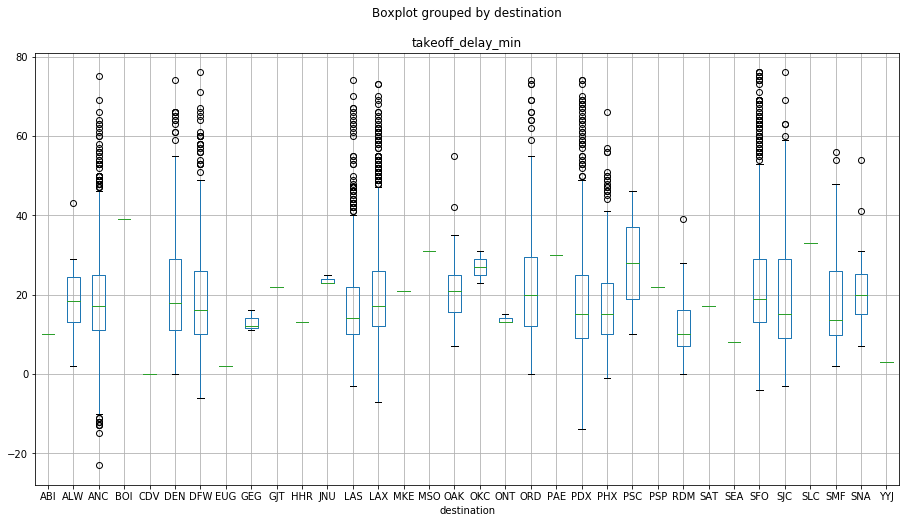

In [78]:
df_w.boxplot('takeoff_delay_min',by='destination',figsize=(15,8));

In [79]:
df_w['takeoff_delay_min'].describe()

count    6987.000000
mean       20.091026
std        13.497432
min       -23.000000
25%        11.000000
50%        17.000000
75%        26.000000
max        76.000000
Name: takeoff_delay_min, dtype: float64

In [80]:
df_m=df_w.drop(columns=['actual_departure','actual_takeoff','aircraft','date','delay','dep_hour','departure_delay','flightid','scheduled_departure', 'scheduled_takeoff','monthday','SNOW',
                       'day_merge', 'MONTH_x', 'DAY_OF_MONTH_x','ORIGIN_x', 'DEST_x', 
                        'MONTH_y', 'DAY_OF_MONTH_y','ORIGIN_y', 'DEST_y'])

In [81]:
df_m.columns

Index(['airline', 'destination', 'distance', 'day_of_week', 's_depart_hr',
       'departure_delay_min', 'takeoff_delay', 'takeoff_delay_min', 'PRCP',
       'AWND', 'WT01', 'month', 'day', 'capacity', 'weekend', 'timeperiod',
       'holiday', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'days_from_holiday'],
      dtype='object')

In [82]:
df_m=df_m[['takeoff_delay_min','departure_delay_min','capacity','distance','s_depart_hr','PRCP', 'AWND', 'WT01','month', 'day', 'weekend', 'days_from_holiday','airline','day_of_week','timeperiod','destination',
          'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [83]:
df_m.loc[(df_m['departure_delay_min']>120)|(df_m['departure_delay_min']<-120),'departure_delay_min']=None
df_m.loc[(df_w['takeoff_delay_min']>120)|(df_m['takeoff_delay_min']<-120),'takeoff_delay_min']=None

In [84]:
df_m=df_m[df_m['destination'].isin(destination_list)]

In [85]:
df_m=df_m.dropna()

In [86]:
lsm = smf.ols('takeoff_delay_min ~ departure_delay_min+airline+timeperiod+capacity+DEP_DELAY+ARR_DELAY+LATE_AIRCRAFT_DELAY+SECURITY_DELAY+weekend+days_from_holiday', data = df_m)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      takeoff_delay_min   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     840.2
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:56:06   Log-Likelihood:                -22587.
No. Observations:                6774   AIC:                         4.522e+04
Df Residuals:                    6749   BIC:                         4.539e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     22.1702      1.164     19.048      0.000      19.888      24.452
airline[T.Alaska]             -9.6197      0.936    -10.279      0.000     -11.454      -7.785
airline[T.American]          -12.4904      1.016    -12.300      0.000     -14.481     -10.500
airline[T.Compass]           -13.8512      1.056    -13.116      0.000     -15.921     -11.781
airline[T.Delta]             -11.4525      1.030    -11.123      0.000     -13.471      -9.434
airline[T.FedEx]             -30.6950      1.581    -19.416      0.000     -33.794     -27.596
airline[T.Frontier Flight]   -16.5941      1.505    -11.026      0.000     -19.544     -13.644
airline[T.Horizon Air]       -26.0144      1.080    -24.078      0.000     -28.132     -23.896
airline[T.JetBlue]            -8.8975      6.875     -1.294      0.196     -22.374       4.579
airline[T.SkyWest]           -13.3194      1.213    -10.977      0.000     -15.698     -10.941
airline[T.Southwest]         -10.7261      1.111     -9.653      0.000     -12.904      -8.548
airline[T.Spirit Wings]      -15.4699      1.158    -13.365      0.000     -17.739     -13.201
airline[T.Sun Country]        -7.7075      3.186     -2.419      0.016     -13.954      -1.461
airline[T.United]            -11.7451      1.112    -10.564      0.000     -13.925      -9.566
timeperiod[T.12-18]            4.0453      0.272     14.887      0.000       3.513       4.578
timeperiod[T.18-24]            1.8470      0.298      6.201      0.000       1.263       2.431
timeperiod[T.6-12]             6.0896      0.273     22.347      0.000       5.555       6.624
departure_delay_min            0.9261      0.007    129.796      0.000       0.912       0.940
capacity                       0.0209      0.004      5.830      0.000       0.014       0.028
DEP_DELAY                      0.0194      0.016      1.246      0.213      -0.011       0.050
ARR_DELAY                      0.0442      0.013      3.441      0.001       0.019       0.069
LATE_AIRCRAFT_DELAY           -0.0138      0.006     -2.353      0.019      -0.025      -0.002
SECURITY_DELAY                 0.0891      0.136      0.656      0.512      -0.177       0.355
weekend                       -1.2325      0.186     -6.621      0.000      -1.597      -0.868
days_from_holiday              0.0439      0.014      3.129      0.002       0.016       0.071
==============================================================================
Omnibus:                     1236.337   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3558.879
Skew:                           0.961   Prob(JB):                         0.00
Kurtosis:                       5.986   Cond. No.                     1.34e+04
============================

In [87]:
lsm = smf.ols('takeoff_delay_min ~ departure_delay_min', data = df_m)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      takeoff_delay_min   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:56:11   Log-Likelihood:                -23885.
No. Observations:                6774   AIC:                         4.777e+04
Df Residuals:                    6772   BIC:                         4.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.2261      0.101    179.583      0.000      18.027      18.425
departure_delay_min     0.8900      0.008    107.874      0.000       0.874       0.906
==============================================================================
Omnibus:                      447.970   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.018
Skew:                           0.439   Prob(JB):                    3.42e-209
Kurtosis:                       4.622   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

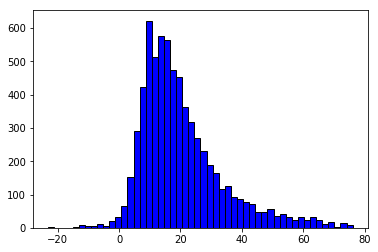

In [99]:
plt.hist(df_m['takeoff_delay_min'], color = 'blue', edgecolor = 'black',
         bins = 50);

In [89]:
T=patsy.dmatrix('timeperiod',data=df_m,return_type='dataframe')
T.columns=['Intercept_t', 'timeperiod[T.12-18]', 'timeperiod[T.18-24]',
       'timeperiod[T.6-12]']

In [90]:
A=patsy.dmatrix('airline',data=df_m,return_type='dataframe')
A.columns=['Intercept_a', 'airline[T.Alaska]', 'airline[T.American]', 'airline[T.Compass]', 'airline[T.Delta]', 'airline[T.FedEx]', 'airline[T.Frontier Flight]',
       'airline[T.Horizon Air]', 'airline[T.JetBlue]', 'airline[T.SkyWest]',
       'airline[T.Southwest]', 'airline[T.Spirit Wings]',
       'airline[T.Sun Country]', 'airline[T.United]']

In [91]:
D=patsy.dmatrix('destination',data=df_m,return_type='dataframe')
D.columns=['Intercept_d', 'destination[T.DEN]', 'destination[T.DFW]',
       'destination[T.LAS]', 'destination[T.LAX]', 'destination[T.ORD]',
       'destination[T.PDX]', 'destination[T.PHX]', 'destination[T.SFO]',
       'destination[T.SJC]']


In [92]:
W=patsy.dmatrix('day_of_week',data=df_m,return_type='dataframe')
W.columns=['Intercept_w', 'day_of_week[T.Monday]', 'day_of_week[T.Saturday]',
       'day_of_week[T.Sunday]', 'day_of_week[T.Thursday]',
       'day_of_week[T.Tuesday]', 'day_of_week[T.Wednesday]']

In [93]:
df_m=df_m.join(A).join(D).join(T).join(W)


In [94]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6774 entries, 142 to 433
Data columns (total 58 columns):
takeoff_delay_min             6774 non-null float64
departure_delay_min           6774 non-null float64
capacity                      6774 non-null int64
distance                      6774 non-null float64
s_depart_hr                   6774 non-null float64
PRCP                          6774 non-null float64
AWND                          6774 non-null float64
WT01                          6774 non-null float64
month                         6774 non-null object
day                           6774 non-null object
weekend                       6774 non-null int64
days_from_holiday             6774 non-null float64
airline                       6774 non-null object
day_of_week                   6774 non-null object
timeperiod                    6774 non-null object
destination                   6774 non-null object
DEP_DELAY                     6774 non-null float64
ARR_DELAY         

In [95]:
df_m=df_m.drop(columns=['month','day','airline','day_of_week','timeperiod', 'destination'])

In [96]:
lr = LinearRegression()
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X = df_m.iloc[:,1:]

y = df_m.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state = 42)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data (Rˆ2)
lr.score(X_test, y_test)


0.74415780306189

In [97]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6774 entries, 142 to 433
Data columns (total 52 columns):
takeoff_delay_min             6774 non-null float64
departure_delay_min           6774 non-null float64
capacity                      6774 non-null int64
distance                      6774 non-null float64
s_depart_hr                   6774 non-null float64
PRCP                          6774 non-null float64
AWND                          6774 non-null float64
WT01                          6774 non-null float64
weekend                       6774 non-null int64
days_from_holiday             6774 non-null float64
DEP_DELAY                     6774 non-null float64
ARR_DELAY                     6774 non-null float64
CARRIER_DELAY                 6774 non-null float64
WEATHER_DELAY                 6774 non-null float64
NAS_DELAY                     6774 non-null float64
SECURITY_DELAY                6774 non-null float64
LATE_AIRCRAFT_DELAY           6774 non-null float64
Intercept_a 

In [98]:
df_m.to_pickle('latest1.pickle')